In [2]:
import QuantLib as ql
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Hull White Model 
## input variable
a=float(input("Please enter a(%): "))*0.01
sigma=float(input("Please enter the volatility of the stock(%): "))*0.01
ForwardRate=float(input("Please enter the forward rate of the stock(%): "))*0.01
day=int(input("Please enter today's date(day): "))
month=int(input("Please enter today's date(month): "))
year=int(input("Please enter today's date(year): "))

length=30 #in years
timestep=360
day_count= ql.Thirty360( )
todays_date= ql.Date(day, month, year)
num_paths = 128

Please enter a(%): 1
Please enter the volatility of the stock(%): 1
Please enter the forward rate of the stock(%): 5
Please enter today's date(day): 15
Please enter today's date(month): 1
Please enter today's date(year): 2015


In [4]:
ql.Settings.instance( ).evaluationDate= todays_date

yield_curve= ql.FlatForward(
    todays_date, 
    ql.QuoteHandle(ql.SimpleQuote(ForwardRate)), 
    day_count)

spot_curve= ql.YieldTermStructureHandle(yield_curve)

In [5]:
hull_white_process=ql.HullWhiteProcess(spot_curve, a, sigma)

###generate_paths is the time grid and a matrix of short rates model= Monte Carlo Method
mcm= ql.GaussianRandomSequenceGenerator(
    ql.UniformRandomSequenceGenerator(
        timestep,
        ql.UniformRandomGenerator(125)))

seq= ql.GaussianPathGenerator(hull_white_process, length, timestep, mcm, False)

In [7]:
def generate_paths(num_paths, timestep):
    arr = np.zeros((num_paths, timestep+1))
    
    for i in range(num_paths):
        sample_path = seq.next()
        path = sample_path.value()
        time = [path.time(j) for j in range(len(path))]
        value = [path[j] for j in range(len(path))]
        arr[i, :] = np.array(value)
        
    return np.array(time), arr

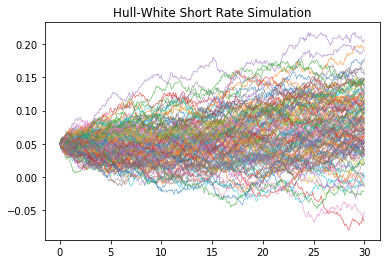

In [8]:
time, paths = generate_paths(num_paths, timestep)

for i in range(num_paths):
    plt.plot(time, paths[i, :], lw=0.8, alpha=0.6)
    
plt.title("Hull-White Short Rate Simulation")
plt.show()

In [9]:
#Geometric Brownian Motion
## input variable
maturity=float(input("Please enter maturity of the bond (years): "))
strike_price=float(input("Please enter the strike price ($): "))
current_price=float(input("Please enter the current price ($): "))
rate=float(input("Please enter riskless interest rate (%): "))*0.01
time=float(input("Please enter each period length (months): "))/12

dt=round(maturity/time)

Please enter maturity of the bond (years): 3
Please enter the strike price ($): 60
Please enter the current price ($): 55
Please enter riskless interest rate (%): 3
Please enter each period length (months): 3


In [10]:
def GBM(S0, short_rate, sigma, N, dt):
    
    seed=5
    
    def Brownian(seed, N):
        
        np.random.seed(seed)
        b=np.random.normal(0., 1., int(N))*np.sqrt(dt)
        W=np.cumsum(b)
        return W, b
    
    b=Brownian(seed, N)[1]
    
    W=Brownian(seed, N)[0]
    W=np.insert(W, 0, 0)
    
    t=np.linspace(0., 1., N+1)
    S=[]
    S.append(S0)
    for i in range(1, int(N+1)):
        drift=(short_rate - 0.5*sigma**2)*t[1]
        diffusion= sigma*W[i-1]
        S_temp= S0*np.exp(drift+diffusion)
        S.append(S_temp)
    return S, t

In [11]:
for i in range(num_paths):
    gbm=GBM(current_price, paths[i, :], sigma, num_paths, dt)[0]
    gbm_time=GBM(current_price, paths[i, :], sigma, num_paths, dt)[1]

In [12]:
#Calculate payoff

for i in range(len(gbm)):
    price=gbm[i]
    discount_price=np.exp(-1*rate*i)*price
    call_price=strike_price-discount_price
    put_price=discount_price-strike_price
    

In [13]:
print("The mean call price is: ", max(0, np.mean(call_price)))
print("The mean put price is: ", max(0, np.mean(put_price)))

The mean call price is:  58.50191658817918
The mean put price is:  0
